In [1]:
# Learned how to use json to get the current citibke status
import requests
import json
import pandas as pd

# Public json url from Citibike
stations_url = 'https://feeds.citibikenyc.com/stations/stations.json'

# Request the response and parse the json
resp = requests.get(url=stations_url)
data = resp.json()

In [2]:
# Show a sample of the json dicts
# The Citibike Station json returns a list of dicts
data['stationBeanList'][0]

{'id': 298,
 'stationName': '3 Ave & Schermerhorn St',
 'availableDocks': 13,
 'totalDocks': 35,
 'latitude': 40.68683208,
 'longitude': -73.9796772,
 'statusValue': 'In Service',
 'statusKey': 1,
 'availableBikes': 22,
 'stAddress1': '3 Ave & Schermerhorn St',
 'stAddress2': '',
 'city': '',
 'postalCode': '',
 'location': '',
 'altitude': '',
 'testStation': False,
 'lastCommunicationTime': '2019-07-07 04:31:39 PM',
 'landMark': ''}

In [3]:
# Process the list of dictionary into DataFrame
station_df = pd.DataFrame(data['stationBeanList'])

In [4]:
# Show the list of columns in the DataFrame
station_df.columns

Index(['altitude', 'availableBikes', 'availableDocks', 'city', 'id',
       'landMark', 'lastCommunicationTime', 'latitude', 'location',
       'longitude', 'postalCode', 'stAddress1', 'stAddress2', 'stationName',
       'statusKey', 'statusValue', 'testStation', 'totalDocks'],
      dtype='object')

In [5]:
# Preview the DataFrame
station_df.head(5)

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,22,13,,298,,2019-07-07 04:31:39 PM,40.686832,,-73.979677,,3 Ave & Schermerhorn St,,3 Ave & Schermerhorn St,1,In Service,False,35
1,,15,15,,307,,2019-07-07 04:29:32 PM,40.714275,,-73.989900,,Canal St & Rutgers St,,Canal St & Rutgers St,1,In Service,False,30
2,,18,31,,358,,2019-07-07 04:31:14 PM,40.732916,,-74.007114,,Christopher St & Greenwich St,,Christopher St & Greenwich St,1,In Service,False,50
3,,20,7,,426,,2019-07-07 04:31:09 PM,40.717548,,-74.013221,,West St & Chambers St,,West St & Chambers St,1,In Service,False,29
4,,8,23,,432,,2019-07-07 04:30:49 PM,40.726218,,-73.983799,,E 7 St & Avenue A,,E 7 St & Avenue A,1,In Service,False,31


In [6]:
station_df = station_df[['id', 
                         'stationName',
                         'availableBikes', 
                         'availableDocks', 
                         'totalDocks',
                         'statusValue']]

In [7]:
station_df.sort_values(by='availableBikes', 
                             ascending=False)
station_df.head(10)

,id,stationName,availableBikes,availableDocks,totalDocks,statusValue
0,298,3 Ave & Schermerhorn St,22,13,35,In Service
1,307,Canal St & Rutgers St,15,15,30,In Service
2,358,Christopher St & Greenwich St,18,31,50,In Service
3,426,West St & Chambers St,20,7,29,In Service
4,432,E 7 St & Avenue A,8,23,31,In Service
5,438,St Marks Pl & 1 Ave,18,28,47,In Service
6,487,E 20 St & FDR Drive,7,27,34,In Service
7,504,1 Ave & E 16 St,1,52,53,In Service
8,532,S 5 Pl & S 5 St,27,15,43,In Service
9,3092,Berry St & N 8 St,11,16,27,In Service


In [8]:
# Create a boolean array mask where there are no bikes
# Make sure the station is in service right now.
in_service_mask = (station_df['statusValue'] == 'In Service')

# Active station only
active_station = station_df[in_service_mask]

# Find out which station has no bike avaliable
zero_bike_mask = (active_station['availableBikes'] == 0)

# Apply the zero_bike_mask
zero_bike = active_station[zero_bike_mask]

# Sample the output
zero_bike.sample(5)

,id,stationName,availableBikes,availableDocks,totalDocks,statusValue
552,3383,Cathedral Pkwy & Broadway,0,25,25,In Service
78,291,Madison St & Montgomery St,0,18,20,In Service
474,3299,E 98 St & Park Ave,0,25,25,In Service
246,513,W 56 St & 10 Ave,0,27,29,In Service
696,3571,Bedford Ave & Bergen St,0,23,24,In Service


# Question: How many stations are without bike?

In [9]:
# Get the count of stations without bikes
num_of_stations_without_bike = zero_bike['id'].count()
print('There are {0:,} stations without bike!'.format(
    num_of_stations_without_bike))

There are 52 stations without bike!


In [20]:
# Find out which station has no dock avaliable
zero_dock_mask = (active_station['availableDocks'] == 0)

# Apply the zero_dock_mask
zero_dock = active_station[zero_dock_mask]

zero_dock.sample(5)

,id,stationName,availableBikes,availableDocks,totalDocks,statusValue
288,3044,Albany Ave & Fulton St,26,0,27,In Service
201,458,11 Ave & W 27 St,27,0,31,In Service
813,3756,White St & Moore St,21,0,21,In Service
565,3397,Court St & Nelson St,25,0,25,In Service
362,3136,5 Ave & E 63 St,47,0,47,In Service


# Question: How many stations are without a dock?

In [21]:
num_of_stations_without_dock = zero_dock['id'].count()
print('There are {0:,} stations without dock!'.format(
    num_of_stations_without_dock))

There are 32 stations without dock!


In [22]:
total = active_station.shape[0]
no_dock = num_of_stations_without_dock
no_bike = num_of_stations_without_bike

In [34]:
arr = pd.Series([no_dock, no_bike, total],
                dtype='int64',
                index=['No Dock', 'No Bike', 'Active (Has Both)'])

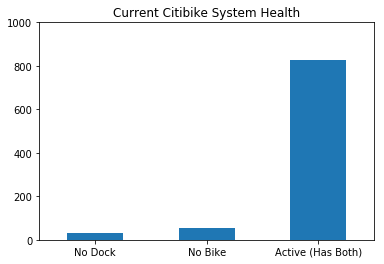

In [40]:
arr.plot(kind='bar', rot=0,
         ylim=(0, 1000),
         title='Current Citibike System Health')